In [3]:
!pip install diagrams

     |████████████████████████████████| 15.2MB 47kB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=ac1f9dfd0ebe5c1712e56a2e870616cccd6ace200da35d3bcb91d591c1085b8c
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


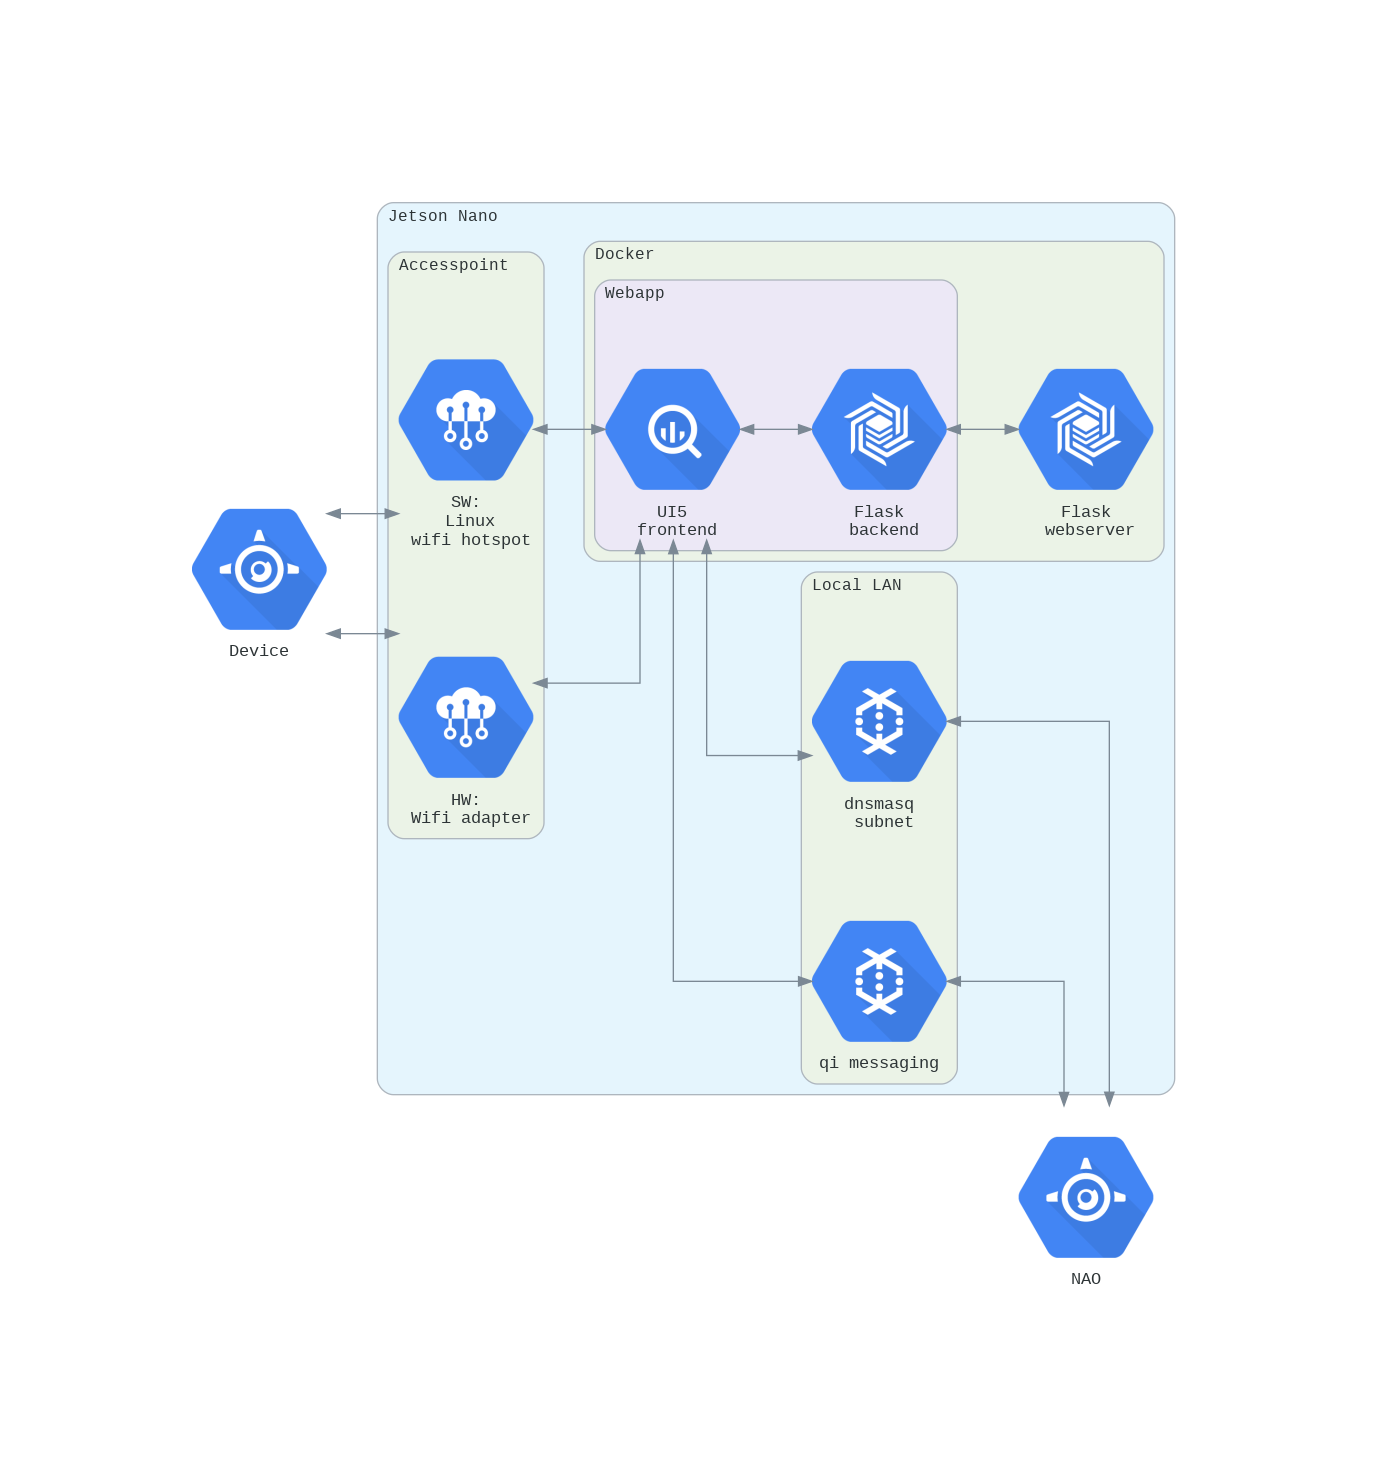

In [61]:
from diagrams import Cluster, Diagram, Edge
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS


with Diagram() as diag:

  entry = AppEngine("Device")

  with Cluster("Jetson Nano"):
      with Cluster("Accesspoint"):
          sw = IotCore("SW:\n Linux\n wifi hotspot")
          hw = IotCore("HW:\n Wifi adapter")
          
      with Cluster("Docker"):
          with Cluster("Webapp"):
              front = BigQuery("UI5\n frontend")
              back = BigTable("Flask\n backend")
          webserver = BigTable("Flask\n webserver")
      with Cluster("Local LAN"):
              masq = Dataflow("dnsmasq\n subnet")
              qimsg = Dataflow("qi messaging")

  nao = AppEngine("NAO")

  entry >> Edge() << [sw, hw] >> Edge() << front >> Edge() << back >> Edge() << webserver
  #[sw, hw] >> entry
  #front >> [sw, hw]
  #back >> front
  #webserver >> back
  front >> Edge() << [masq, qimsg] >> Edge() << nao
  #[masq, qimsg] >> front
  #nao >> [masq, qimsg]

diag